## Growth vs Business Cycles

#### Config

In [35]:
## load some packages
from pandas_datareader.fred import FredReader  # gets data without a bunch of csvs
import matplotlib.pyplot as plt  # make plots
import statsmodels.api as sm  # regressions
import numpy as np  # math things

# fonts look pretty
plt.rcParams.update({
        'text.usetex': True,
        'font.family': 'serif',
    })

#### Data

In [36]:
## data config
start = '1900-01'
end = '2007-12'
series = {
        'GDPDEF': 'gdpdef',  # gdp deflator
        'GDP': 'gdp',  # gdp per capita
        'POP': 'pop',  # population
    }

## pull the data
df = FredReader(series.keys(), start=start, end=end).read().rename(columns=series).dropna()

## real terms
df['rgdppc'] = 1000000 * 100 * df['gdp'] / df['gdpdef'] / df['pop']
# 1000000: gdp units
# 100: gdpdef units

df

,gdpdef,gdp,pop,rgdppc
DATE,,,,
1952-01-01,13.190,359.820,156309.0,17452.454684
1952-04-01,13.206,361.030,156943.0,17419.273916
1952-07-01,13.354,367.701,157553.0,17476.592582
1952-10-01,13.390,380.812,158306.0,17965.225496
1953-01-01,13.393,387.980,158973.0,18222.505917
...,...,...,...,...
2006-10-01,84.770,14039.560,299835.0,55236.860553
2007-01-01,85.576,14215.651,300574.0,55266.677819
2007-04-01,86.171,14402.082,301254.0,55479.344902


#### Figure

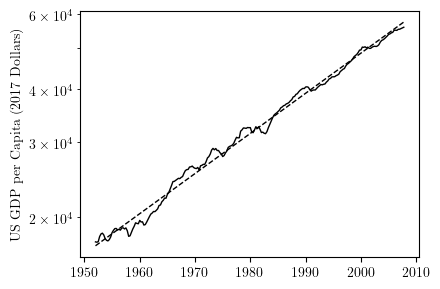

In [37]:
## setup
fig, ax = plt.subplots()
fig.set_figwidth(4.5)
fig.set_figheight(3)
ax.set_yscale('log')
ax.set_ylabel('US GDP per Capita (2017 Dollars)')

## plot actual
ax.plot(df.index, df['rgdppc'], 'k-', linewidth=1)

## trend
reg = sm.OLS(np.log(df['rgdppc']), sm.add_constant(np.arange(len(df)))).fit()
ax.plot(df.index[[0, -1]], np.exp(reg.predict()[[0, -1]]), 'k--', linewidth=1)

## final things
fig.tight_layout()
fig.savefig('paper/figures/growth_effects.pdf', bbox_inches='tight')